## Customer churn prediction

ConnectTel is a leading telecommunications company at 
the forefront of innovation and connectivity solutions.

In [1]:
#Package importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
data = pd.read_csv("C:/Users/uzond/Downloads/Machine learning Projects/Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Data verification

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


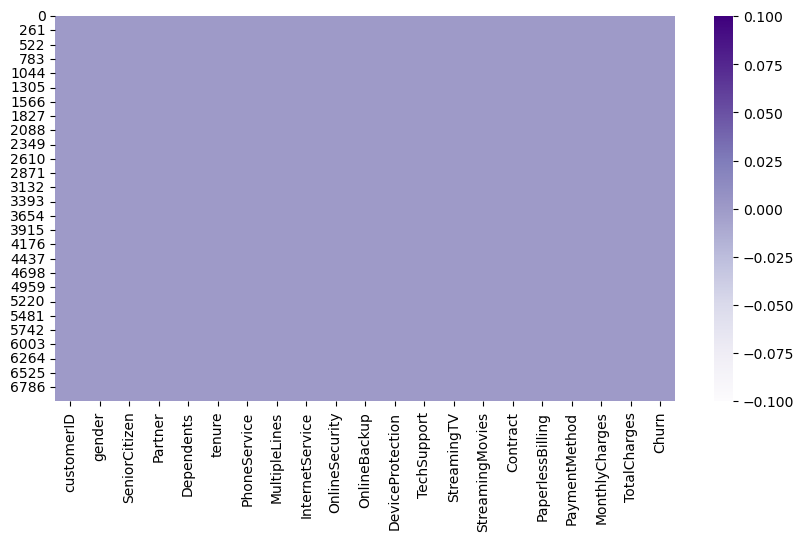

In [6]:
plt.figure(figsize = (10,5))
sns.heatmap(data= data.isnull(), cmap = "Purples", vmin = 0, vmax =0)
plt.xticks(rotation = 90)
plt.show();

# EXPLORATORY DATA ANALYSIS

# Data cleaning

Noticed that TotalCharges was classified as an object but actually has a float values.

In [7]:
#converting  Tot to numerical valuealCharges to numerical value

data['TotalCharges'].dtypes

dtype('O')

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### There are 7043 customers in this dataset

# Feature distribution/spliting

 I will plot the distribution of numerical and categorical feature to check for outliers and compare feature distributions with the target variables

In [10]:
categorical_features = ["gender",
"Partner",
"Dependents",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity", 
"OnlineBackup",
"DeviceProtection",
"TechSupport", 
"StreamingTV", 
"StreamingMovies", 
"Contract", 
"PaperlessBilling",
"PaymentMethod",]

numerical_df = ["SeniorCitizen","tenure","MonthlyCharges", "TotalCharges"]

target = "Churn"

In [11]:
numerical_df

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
numeric_data = data.select_dtypes(exclude = "object")

In [13]:
numeric_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


##### Numerical feature distribution

In [14]:
data.skew(numeric_only = True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [15]:
data.corr(numeric_only =True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


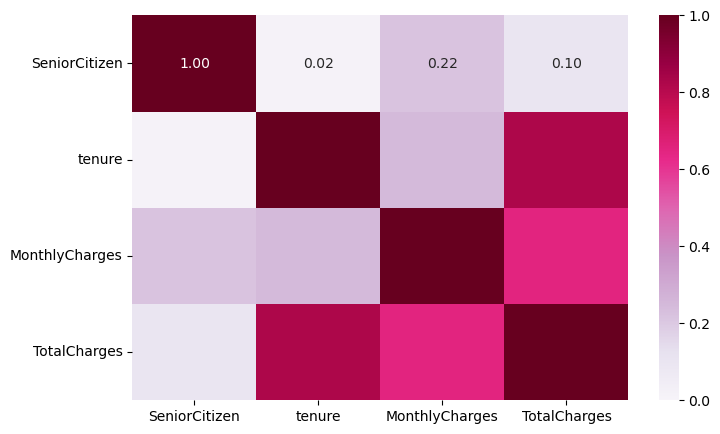

In [16]:
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(numeric_only =True), cmap = "PuRd", vmin = 0, vmax = 1, annot = True, fmt = ".2f");

All the numerical feature revealed positive correlation. 
Totalcharges with MonthlyCharges and tenure show a higher positive correlation 

In [17]:
data[numerical_df].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


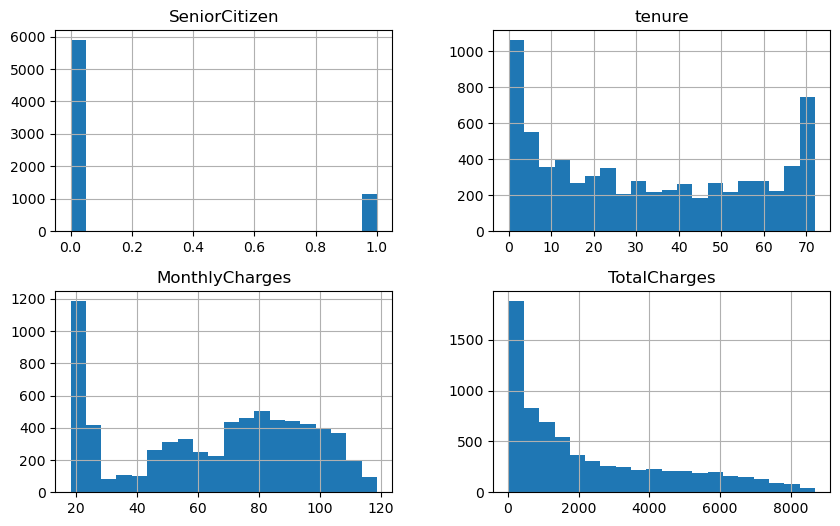

In [18]:
data[numerical_df].hist(bins = 20, figsize =(10,6));

I will be comparing the numerical features to target variables to observe what could have an impact on the churn rate

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

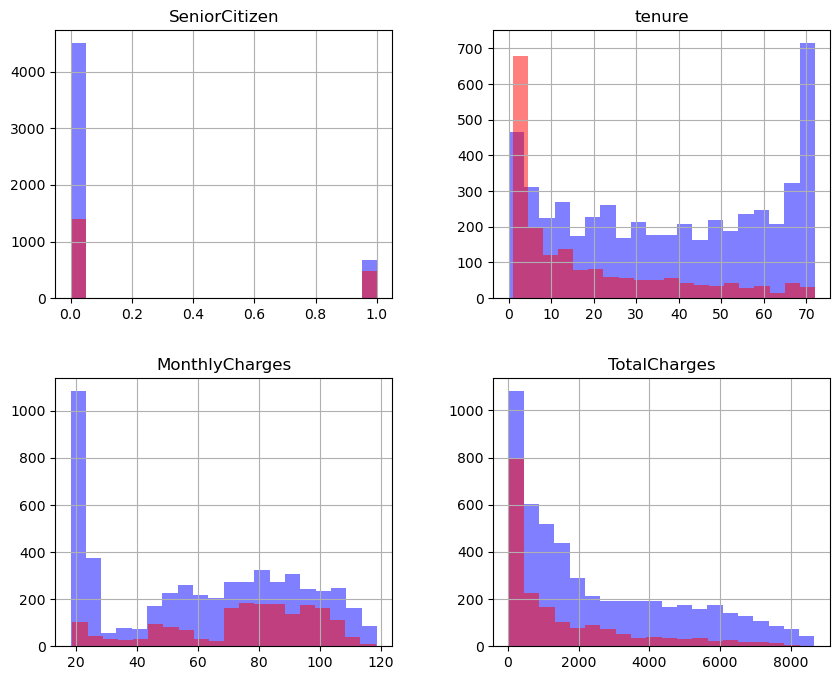

In [19]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize = (10,8))
data[data.Churn  == "No"][numerical_df].hist(bins = 20,color ="blue", alpha = 0.5, ax = ax)
data[data.Churn  == "Yes"][numerical_df].hist(bins = 20,color ="red", alpha = 0.5, ax = ax)

from the hisplot comparing the numerical features to the target variables, I can observe that the greater the tenure and MonthlyCharges the less probabilty to churn

The greater the TotalCharges the greater the probability to churn

## Categorical Data EDA

In [20]:
categorical_df = data.select_dtypes(include = ["object"])

In [21]:
categorical_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


The TotalCharges column keeps appearing as a categorical feature, therefore i will drop the column using a drop function.

In [22]:
categorical_df.tail()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7042,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No


In [23]:
#checking for imbalance for churn
categorical_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
categorical_df= categorical_df.drop("customerID", axis =1)

In [25]:
categorical_df.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [26]:
#printing out each feature and the number of each unique content

categorical_columns = categorical_df.columns.to_list()

for feature in categorical_columns:
    print(f"{feature} -----------------> {categorical_df[feature].nunique()}")

gender -----------------> 2
Partner -----------------> 2
Dependents -----------------> 2
PhoneService -----------------> 2
MultipleLines -----------------> 3
InternetService -----------------> 3
OnlineSecurity -----------------> 3
OnlineBackup -----------------> 3
DeviceProtection -----------------> 3
TechSupport -----------------> 3
StreamingTV -----------------> 3
StreamingMovies -----------------> 3
Contract -----------------> 3
PaperlessBilling -----------------> 2
PaymentMethod -----------------> 4
Churn -----------------> 2


In [27]:
for feature in categorical_columns:
    print(feature)
    print(categorical_df[feature].unique())
    print("\n")

gender
['Female' 'Male']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




### Univariate Analysis

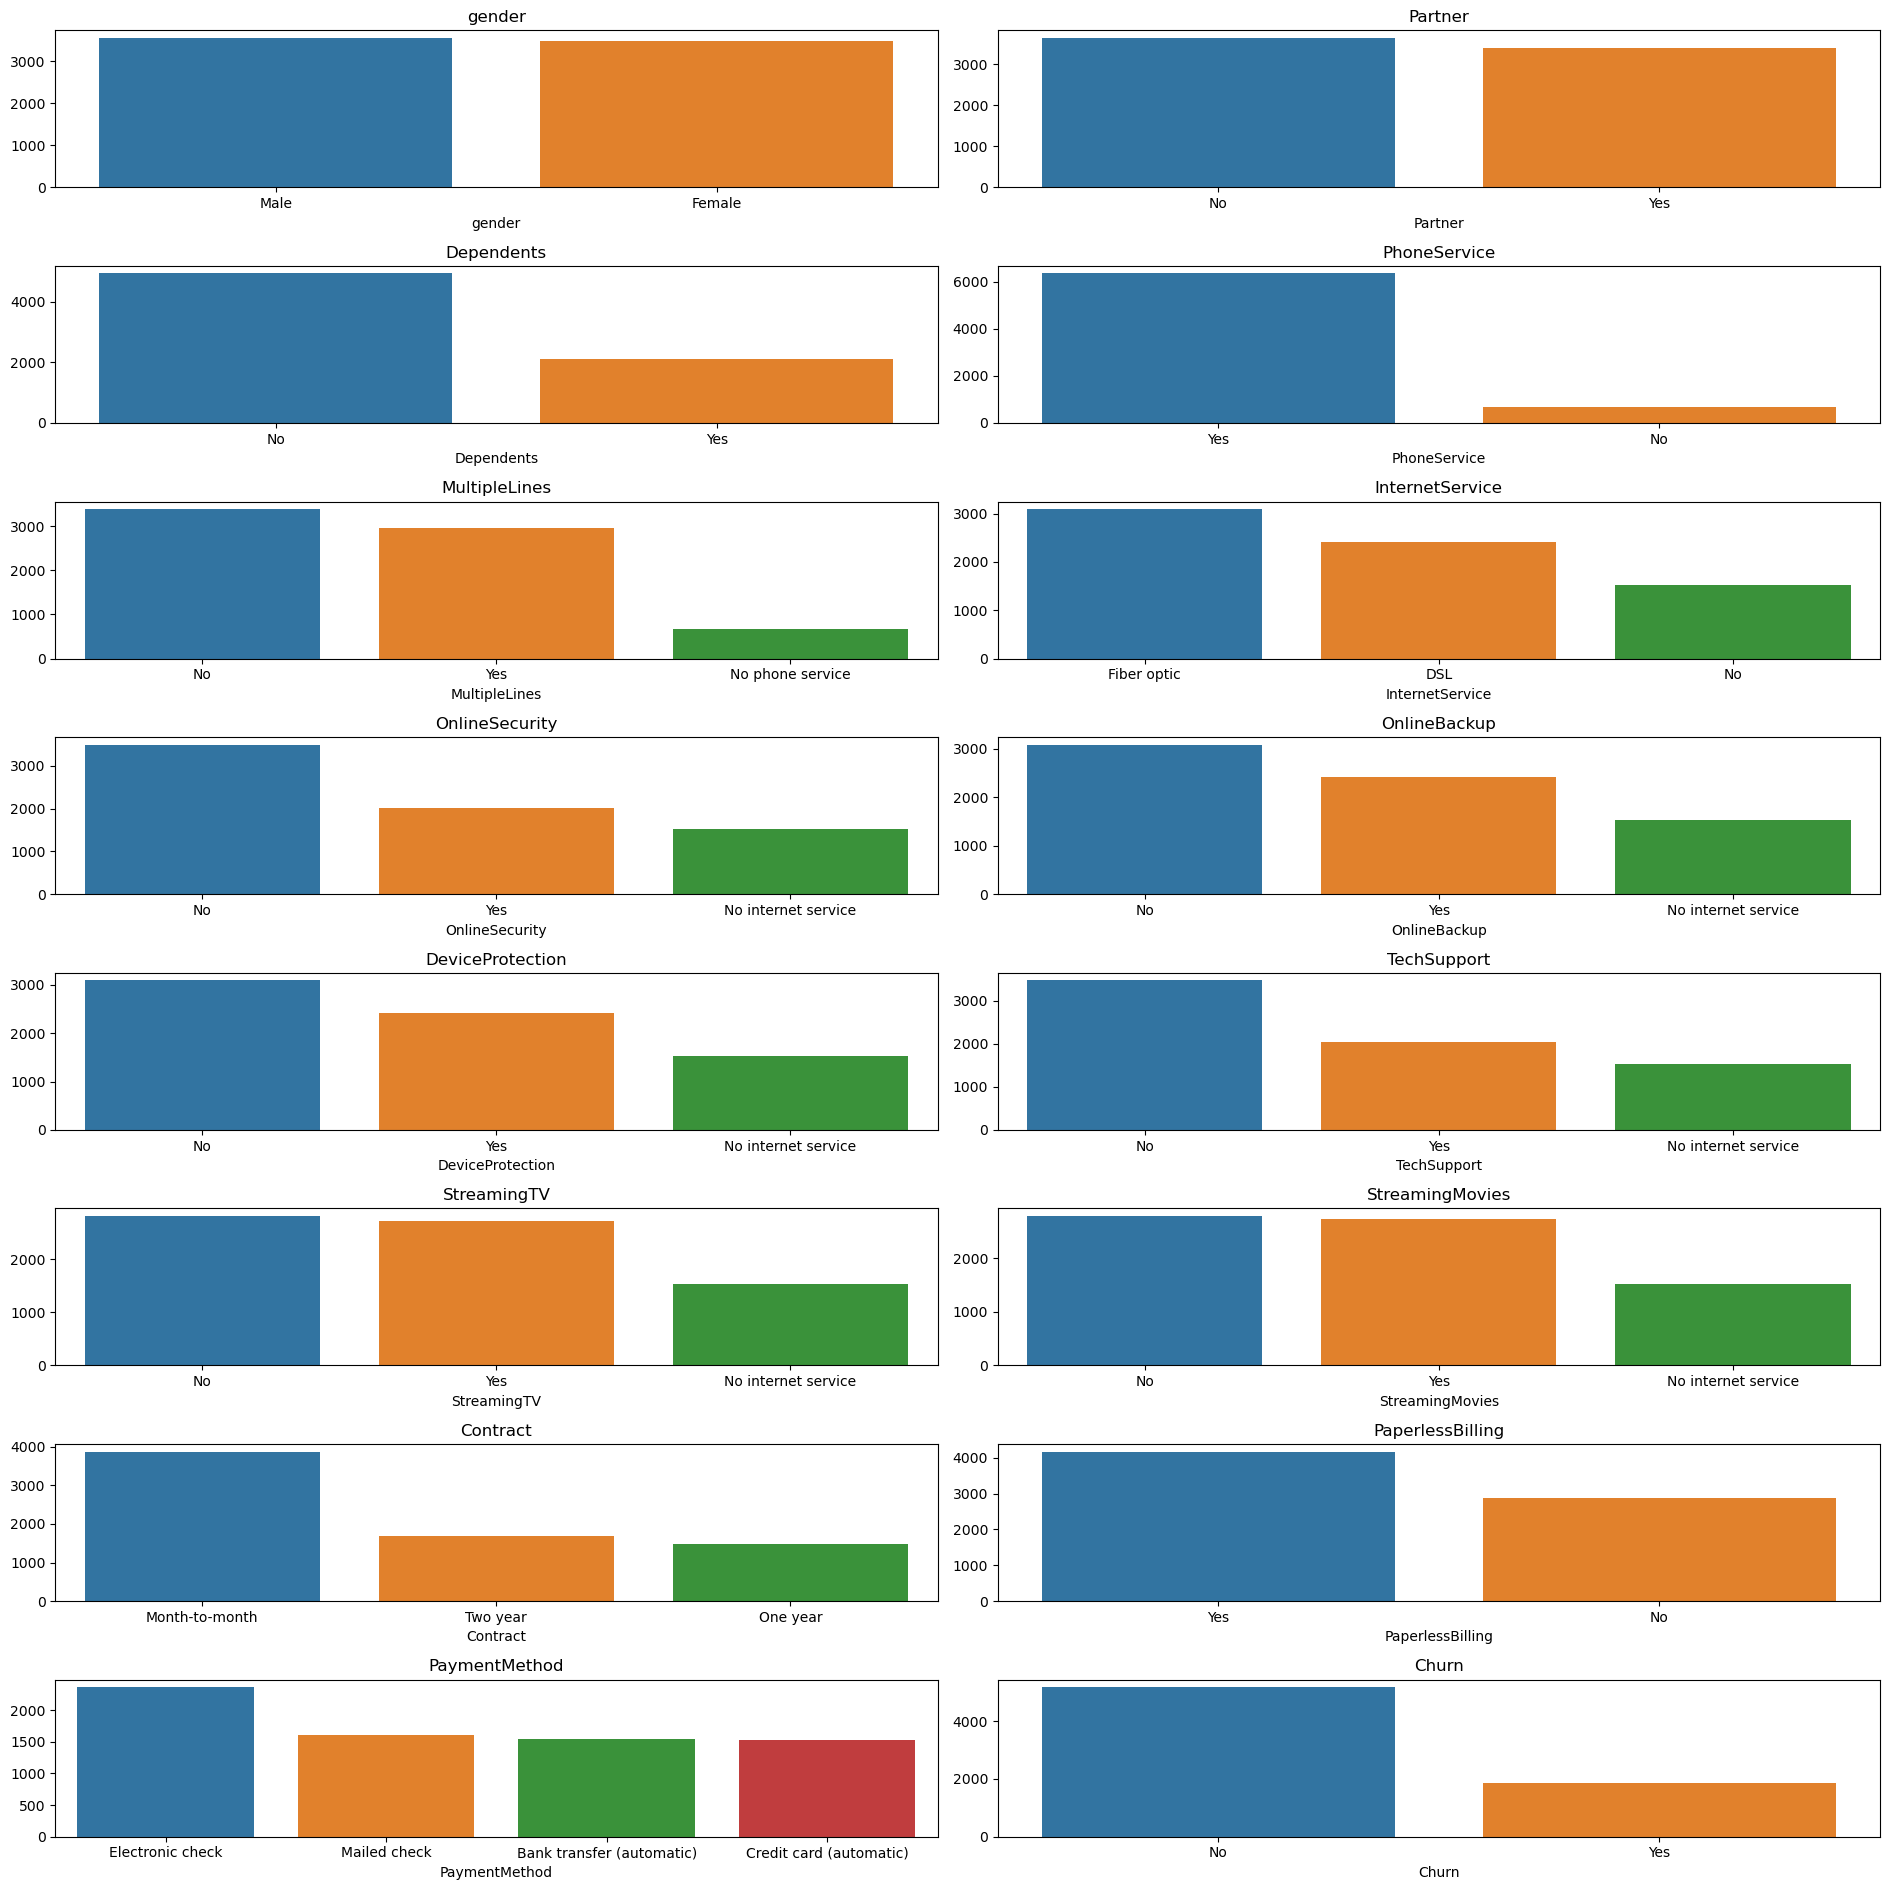

In [28]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize = (19,19))

position = axes.flatten()

for index, feature in enumerate(categorical_columns):
    sns.barplot(x = categorical_df[feature].value_counts().index, y =categorical_df[feature].value_counts().values, 
               ax = position[index])
    position[index].set_title(feature)
    
plt.tight_layout()

### Bivariate Analysis

comparing each categorical_df with the churn

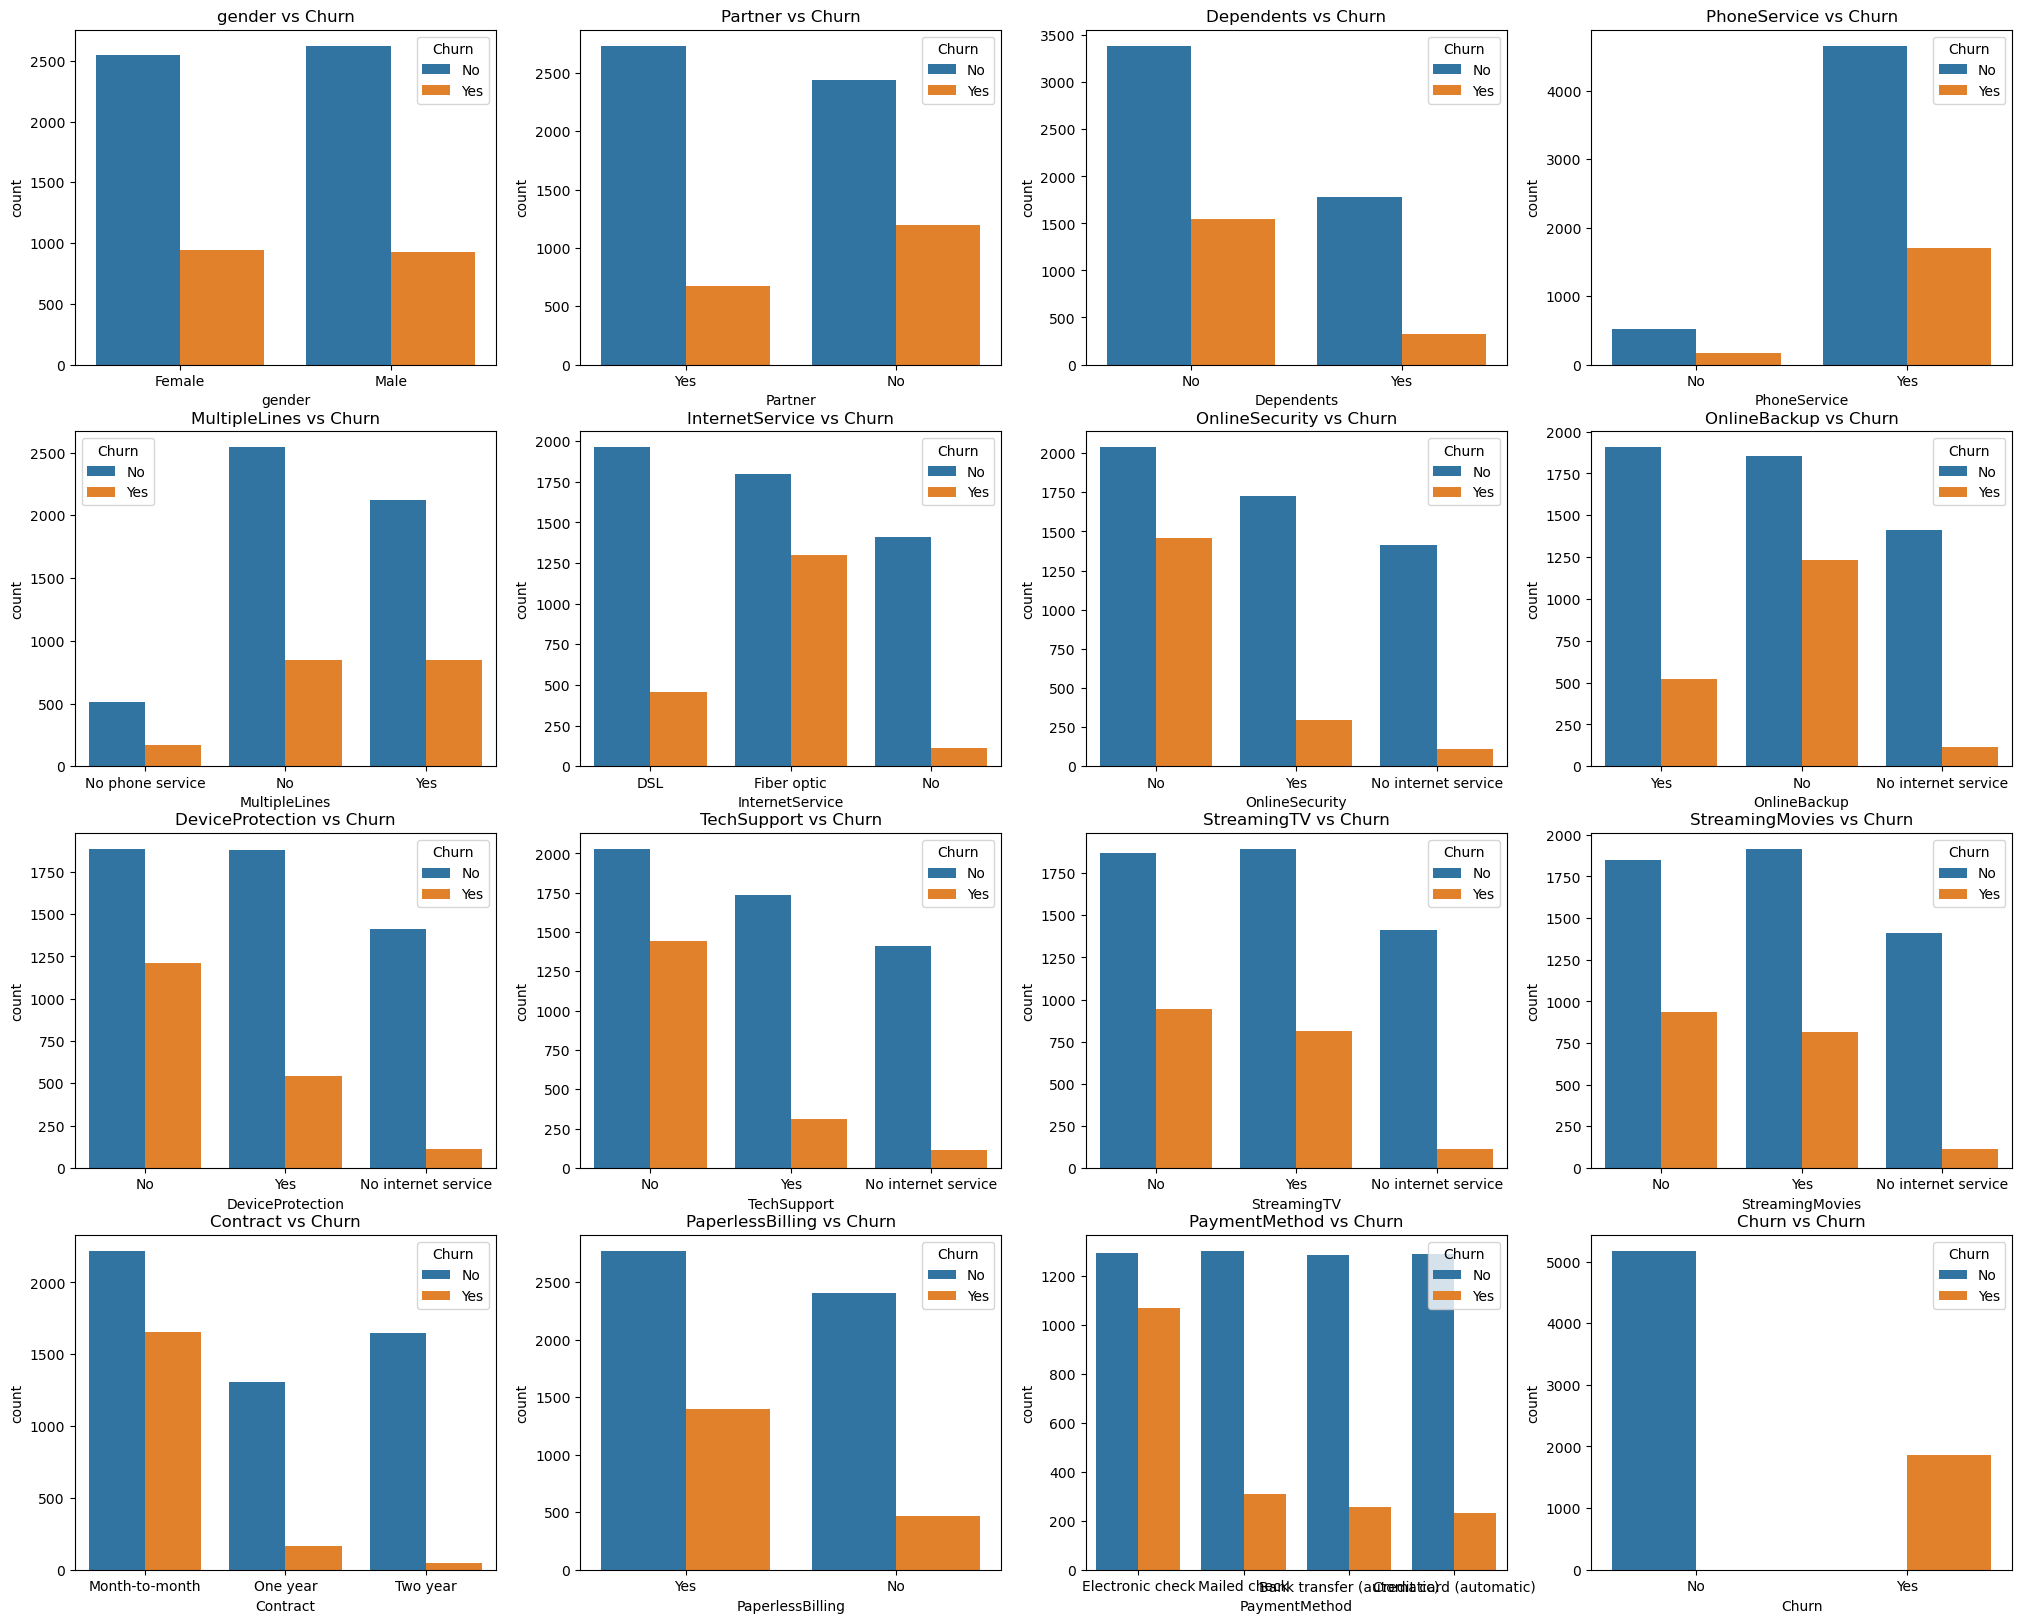

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (25,20))

position = axes.flatten()

for index, feature in enumerate(categorical_df):
    sns.countplot(data = categorical_df, x  = feature, hue = data["Churn"], ax = position[index])
    position[index].set_title(f"{feature} vs Churn")
    


### Analyzing the Churn Rate Bivariate Analysis
Understanding the Visualizations

The provided images present a series of bar charts, each comparing a customer characteristic (like gender, partner status, dependents, etc.) to the churn rate. The **blue bars** represent customers who did not churn, while the **orange bars** represent those who did.

**Key Insights**

**Based on the visual analysis, here are some potential insights:**



#### Demographic Factors
1. Gender: There seems to be a slight difference in churn rates between genders, with males potentially having a slightly higher churn rate.
2. Partner: Customers with partners tend to have a lower churn rate compared to those without.

3. Dependents: Having dependents appears to correlate with a lower churn rate.


##### Service-Related Factors
4. Phone Service: Customers with phone service have a significantly lower churn rate than those without.
5. Multiple Lines: Having multiple lines does not seem to have a strong impact on churn.
6. Internet Service: Customers with fiber optic internet service have a lower churn rate compared to those with DSL or no internet service.
7. Online Security: There's a noticeable difference in churn rates between customers with and without online security, with those having it showing a lower churn rate.

Text(0.5, 1.0, 'churned')

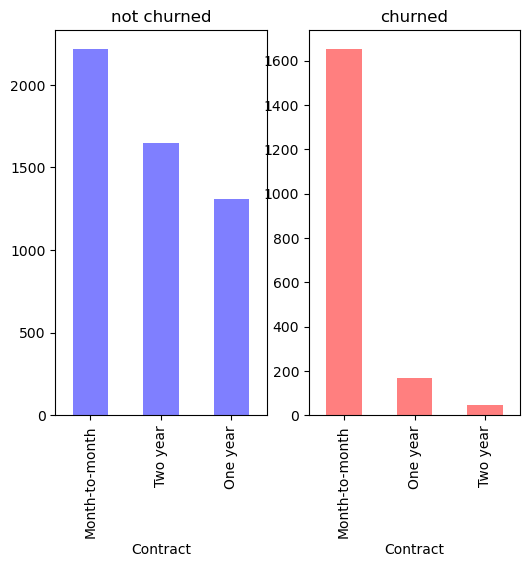

In [30]:
feature = 'Contract'
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (6,5))
data[data.Churn  == "No"][feature].value_counts().plot(kind = 'bar',color ="blue", alpha = 0.5, ax = ax[0]).set_title('not churned')
data[data.Churn  == "Yes"][feature].value_counts().plot(kind = 'bar',color = "red", alpha = 0.5, ax = ax[1]).set_title('churned')

customers on month-month contracts are more likely to churn, followed by one-year and two-year contract respectively

Text(0.5, 1.0, 'churned')

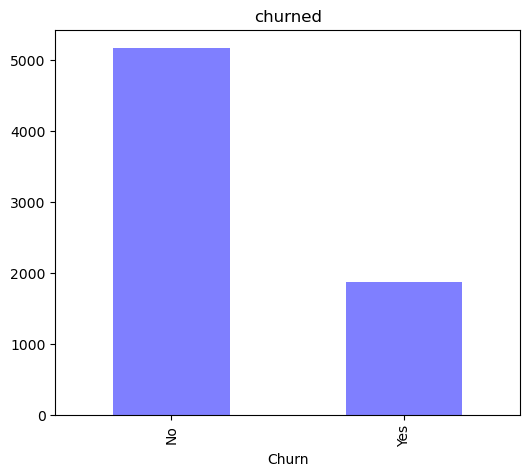

In [31]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize = (6,5))
data[target].value_counts().plot(kind = 'bar',color = "blue", alpha = 0.5, ax = ax).set_title('churned')

the target variable distribution shows we are having an imbalance data as we are having far more non_churned customers than churned.
this could effect the model or cause bias as it could mostly predict non-churned customers.

testing different accuracy metrics could help.
    

C:\Users\uzond\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


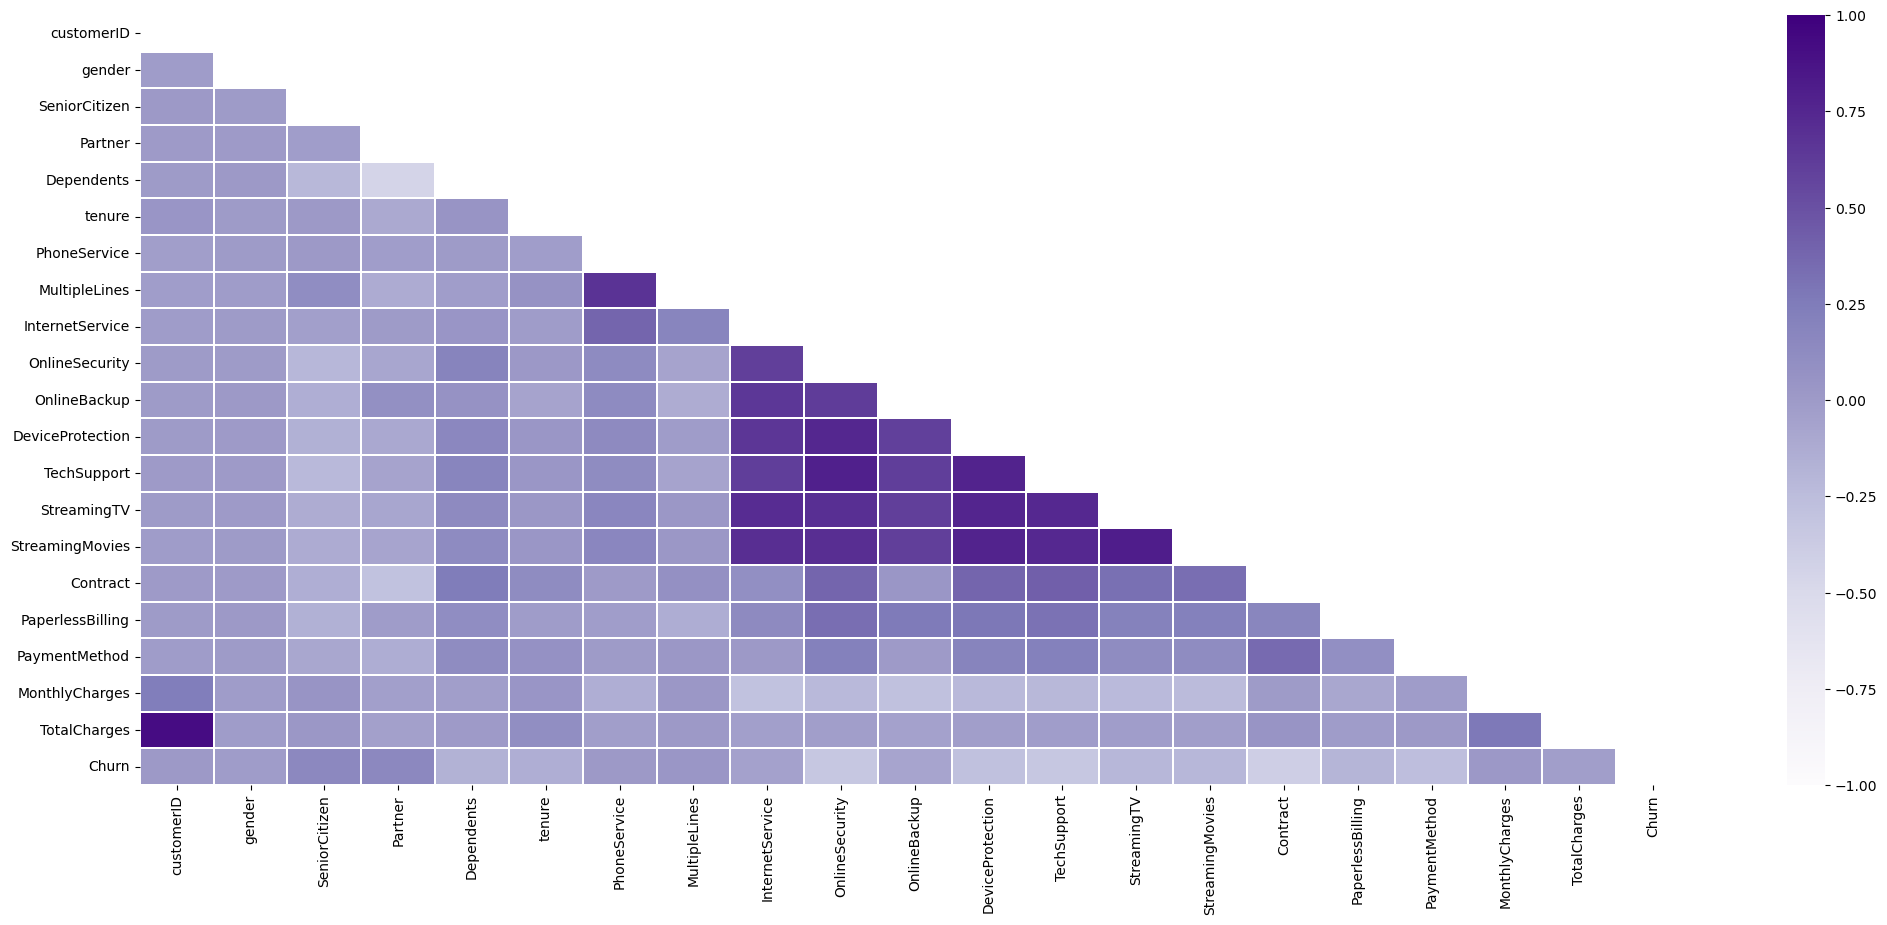

In [32]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='Purples', vmin=-1, vmax=1)

#### The color intensity represents the correlation coefficient, with darker shades indicating stronger correlations.

Key Observations:

Strong Negative Correlation with Churn:

MonthlyCharges and TotalCharges seem to have a strong negative correlation with Churn. This suggests that customers with higher monthly and total charges are less likely to churn.
Contract also shows a negative correlation with Churn, implying that customers with longer contracts are less likely to leave.
Potential Positive Correlations:

Some variables like SeniorCitizen, Dependents, and OnlineSecurity might have a slight positive correlation with Churn. However, these correlations appear weaker compared to the negative ones.
Limited Correlations:

Many variables show minimal or no correlation with each other, indicating they might not have a strong influence on each other.

#### Explore the relationship between MonthlyCharges, TotalCharges, Contract, and Churn in more detail using scatter plots or other visualization techniques.

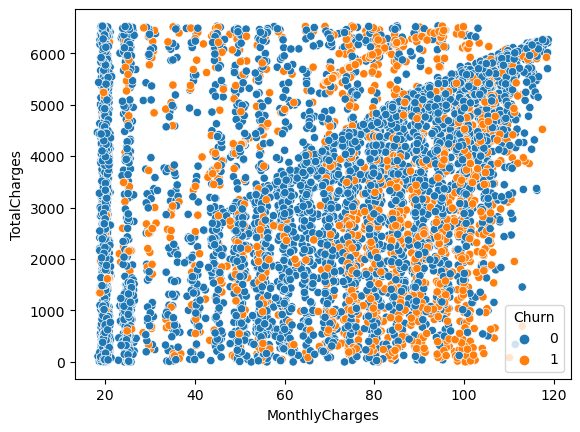

In [58]:


# Scatter plot
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.show()



##### The scatter plot illustrates a positive correlation between TotalCharges and MonthlyCharges, as expected. This indicates that customers with higher monthly charges tend to have higher total charges over time.

Relationship with Churn:

Customers who churn are more likely to have lower TotalCharges: The plot reveals a concentration of churned customers (orange dots) in the lower TotalCharges range. This suggests that customers with lower overall spending are more prone to churn.
MonthlyCharges alone do not strongly predict churn: While there might be a slight tendency for churned customers to have higher MonthlyCharges, the distribution is not as clear-cut as with TotalCharges. This implies that MonthlyCharges might not be as significant a factor in predicting churn compared to TotalCharges.

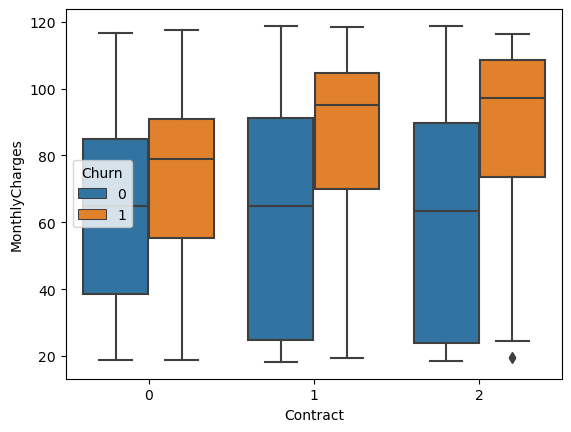

In [59]:
# Box plot
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=data)
plt.show()



#### The boxplot visualizes the distribution of MonthlyCharges across different Contract types, with an additional breakdown by Churn.

Key Observations:

Monthly Charges by Contract:

Contract 0: Has the lowest median MonthlyCharges, with a wider range compared to other contracts.
Contract 1: Shows a slightly higher median MonthlyCharges than Contract 0, with a narrower range.
Contract 2: Exhibits the highest median MonthlyCharges and the widest range among all contracts.
Impact of Churn on Monthly Charges:

For all contract types, customers who churn (orange boxes) tend to have higher median MonthlyCharges compared to those who don't churn (blue boxes).
The difference in MonthlyCharges between churned and non-churned customers is most pronounced in Contract 2.
Outliers:

There is one outlier identified for Contract 2 among non-churned customers, indicating an exceptionally high MonthlyCharge compared to others in that group.
Insights:

Customers with longer contracts (Contract 2) generally have higher MonthlyCharges.
Customers who churn across all contract types tend to have higher MonthlyCharges compared to those who stay.
The outlier in Contract 2 for non-churned customers might warrant further investigation to understand the reason for the exceptionally high MonthlyCharge.
Potential Implications:

Customers with higher MonthlyCharges might be more inclined to churn, especially those with longer contracts.
Analyzing the factors contributing to higher MonthlyCharges for churned customers can help identify potential areas for improvement in customer retention strategies.

# Modelling



### Data preprocessing

In [33]:
data = pd.read_csv("C:/Users/uzond/Downloads/Machine learning Projects/Customer-Churn.csv")
data = data.drop(["customerID"], axis =1)


In [34]:
data.head(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### Encoding categorical variables

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [36]:
def object_to_int(data):
    if data.dtype=='object':
        data = LabelEncoder().fit_transform(data)
    return data

In [37]:
data = data.apply(lambda x: object_to_int(x))

In [38]:
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


#### Spliting Data into train and test sets

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0


In [43]:
X.shape


(7043, 19)

In [44]:
y.shape

(7043,)

#### scaling and standization of numeric varibles

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# Scale our training data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Machine learning, Evaluations and Predictions

# LR

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [49]:
# Train the model
model.fit(X_train, y_train)

C:\Users\uzond\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [50]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
 [[937  99]
 [162 211]]


<Axes: >

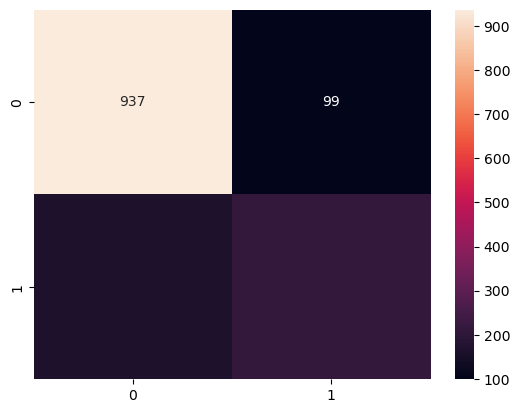

In [52]:
sns.heatmap(matrix, annot=True, fmt='2g')

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77      1036
           1       0.47      0.88      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409

Confusion Matrix:
 [[674 362]
 [ 46 327]]


C:\Users\uzond\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


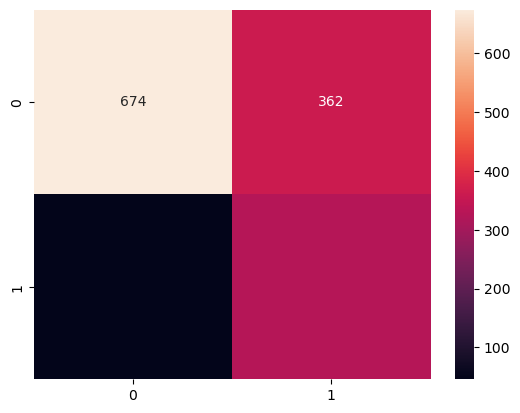

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.12      0.21      1036
           1       0.29      1.00      0.45       373

    accuracy                           0.35      1409
   macro avg       0.64      0.56      0.33      1409
weighted avg       0.81      0.35      0.27      1409

Confusion Matrix:
 [[120 916]
 [  1 372]]


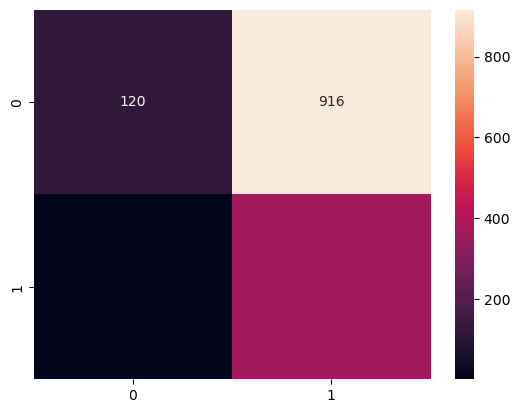

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.49      0.48      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
 [[849 187]
 [195 178]]


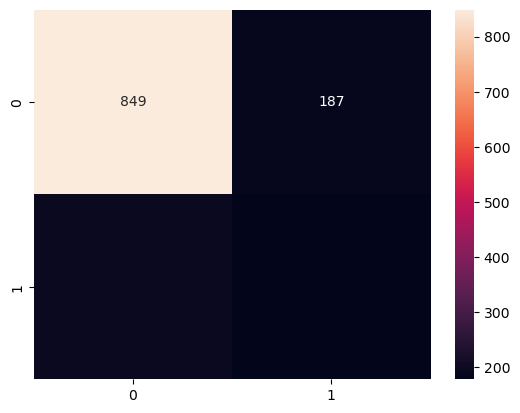

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
 [[956  80]
 [206 167]]


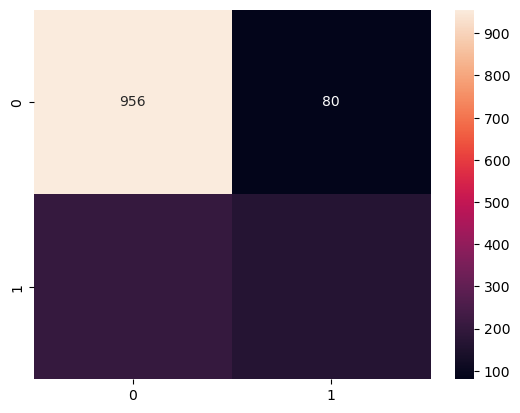

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

### Confusion matrix with scaled data

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77      1036
           1       0.48      0.87      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409

Confusion Matrix:
 [[677 359]
 [ 47 326]]


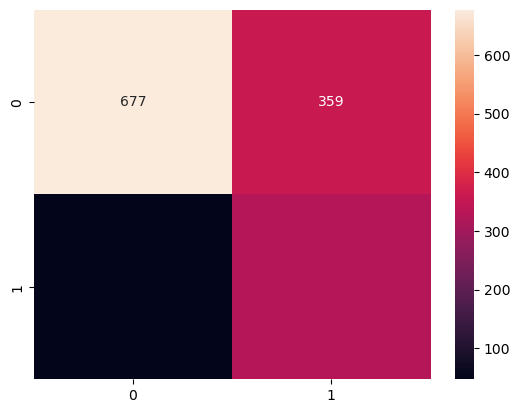

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69      1036
           1       0.42      0.92      0.58       373

    accuracy                           0.64      1409
   macro avg       0.68      0.73      0.63      1409
weighted avg       0.81      0.64      0.66      1409

Confusion Matrix:
 [[555 481]
 [ 28 345]]


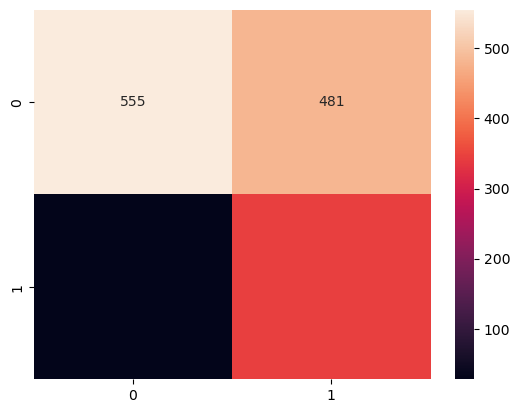

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.49      0.48      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
 [[851 185]
 [194 179]]


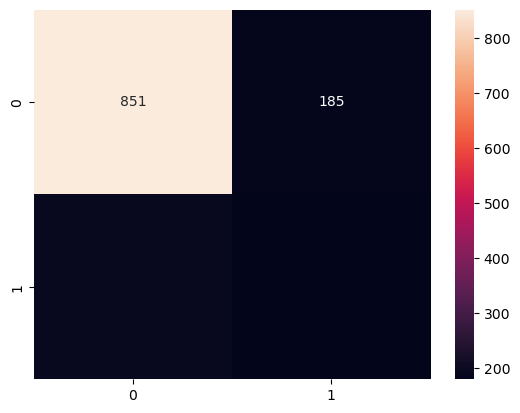

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
 [[956  80]
 [207 166]]


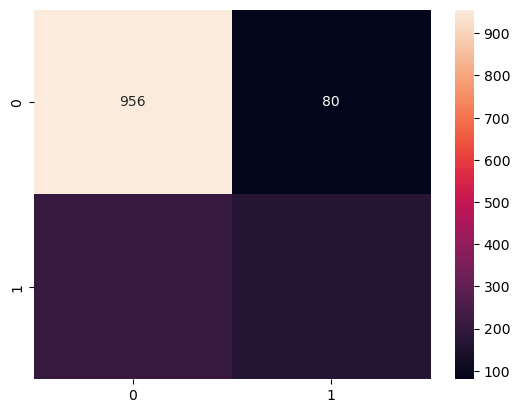

In [56]:



class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

## Conclusion

#### LOGISTICS_REGRESSION

Class 0: Precision: 94%, Recall: 65%, F1-score: 77%
Class 1: Precision: 48%, Recall: 87%, F1-score: 62%
Confusion Matrix:

True Negatives (TN): 677
False Positives (FP): 359
False Negatives (FN): 47
True Positives (TP): 326

The classifier has a relatively good overall accuracy, but there is room for improvement, especially in terms of recall.
The model is better at predicting customers who will not churn (Class 0) than those who will churn (Class 1).
There is a higher number of false positives (customers predicted to churn but did not) compared to false negatives (customers predicted to not churn but did).

### SGD CLASSIFIER

Overall:

The classifier exhibits moderate performance with an accuracy of 68%.
It struggles to predict customers who churn (class 1), as indicated by the low precision (0.42) and recall (0.92) for this class.


The model is better at identifying customers who do not churn (class 0) with high precision (0.95) and recall (0.54).
However, there's a significant imbalance in the prediction of churned customers, with a high number of false positives (481) compared to true positives (345).

### DECISION TREE

Overall:

The decision tree classifier exhibits moderate performance with an accuracy of 65%.
It struggles to predict customers who churn (class 1), as indicated by the low precision (0.49) and recall (0.48) for this class.

The model is better at identifying customers who do not churn (class 0) with high precision (0.81) and recall (0.82).
However, there's a significant imbalance in the prediction of churned customers, with a high number of false positives (185) compared to true positives (179).

### RANDOM FOREST

Overall:

The Random Forest classifier exhibits good performance with an accuracy of 75%.
It effectively predicts customers who do not churn (class 0), as indicated by high precision (0.82) and recall (0.92) for this class.
However, there's room for improvement in predicting customers who churn (class 1), with lower precision (0.67) and recall (0.45).
Specifics:

The model generates a relatively low number of false positives (80) for class 0, meaning it correctly identifies most non-churning customers.
There's a higher number of false negatives (207) for class 1, indicating that the model misses a significant portion of customers who actually churn.

## MORE WORK TO BE DONE

To improve my model these are the things I would consider for further optimization

1. Focus on improving the model's ability to predict churned customers (class 1).
2. Consider techniques to address class imbalance, such as oversampling or undersampling.
3. Evaluate different classification algorithms or hyperparameter tuning to enhance performance